# 생선 길이로 무게 예측

- 회귀(regression)
    - 임의의 어떤 숫자를 예측하는 문제
    - 변수들 사이의 상관관계를 분석하는 방법
- KNN 회귀
    1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
    2. k개의 샘플의 종속변수 값의 평균을 구함

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 데이터 준비

In [4]:
df = pd.read_csv("./data/Fish.csv")

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
# 농어 데이터만 사용
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [11]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


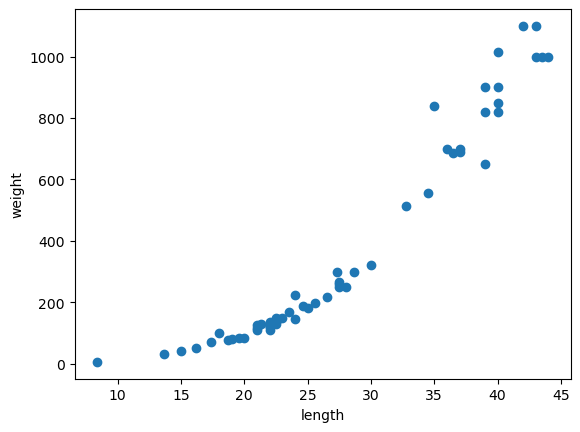

In [13]:
plt.figure()

plt.scatter(df["Length2"], df["Weight"])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 길이 값이 커짐에 따라 무게가 증가하는 경향이 있음

In [16]:
# 75 : 25 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], 
                                                    df["Weight"],
                                                    test_size = 0.25, 
                                                    random_state = 26)

In [18]:
# 독립변수는 2차원 배열이어야 함
x_train.values

array([39. , 36. , 40. , 25.6, 22. ,  8.4, 19.6, 43.5, 39. , 22.5, 44. ,
       40. , 39. , 16.2, 36.5, 26.5, 27.5, 40. , 27.5, 28.7, 22. , 21. ,
       22. , 25. , 23.5, 22. , 27.3, 22.7, 24. , 24. , 22. , 28. , 17.4,
       27.5, 24.6, 21.3, 22.5, 34.5, 13.7, 40. , 18.7, 43. ])

In [20]:
x_train.shape

(42,)

In [22]:
knr = KNeighborsRegressor()
# knr.fit(x_train, y_train)

'''
ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. 
Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.
'''

"\nValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. \nPass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.\n"

In [24]:
x_train = np.reshape(x_train.values, (-1, 1))

In [26]:
x_train

array([[39. ],
       [36. ],
       [40. ],
       [25.6],
       [22. ],
       [ 8.4],
       [19.6],
       [43.5],
       [39. ],
       [22.5],
       [44. ],
       [40. ],
       [39. ],
       [16.2],
       [36.5],
       [26.5],
       [27.5],
       [40. ],
       [27.5],
       [28.7],
       [22. ],
       [21. ],
       [22. ],
       [25. ],
       [23.5],
       [22. ],
       [27.3],
       [22.7],
       [24. ],
       [24. ],
       [22. ],
       [28. ],
       [17.4],
       [27.5],
       [24.6],
       [21.3],
       [22.5],
       [34.5],
       [13.7],
       [40. ],
       [18.7],
       [43. ]])

In [28]:
x_train.shape

(42, 1)

In [30]:
x_test = np.reshape(x_test.values, (-1, 1))

# 모델 훈련

In [33]:
knr = KNeighborsRegressor()

In [35]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

# 모델 평가

- 결정 계수
    - 계산식
        - 1 - ((sum((타깃 - 예측)^2)) / (sum((타깃 - 타깃평균)^2)))
    - 모델의 설명력을 뜻함
    - 1에 가까울수록 모델 성능이 좋다

In [38]:
# 회귀 모델의 결정계수
knr.score(x_test, y_test)

0.9744433455849253

- mean_absolute_error
    - 타깃과 예측의 절댓값 오차를 평균하여 반환

In [41]:
# 테스트 세트에 대한 예측
pred = knr.predict(x_test)

In [43]:
x_test

array([[21. ],
       [20. ],
       [18. ],
       [30. ],
       [21. ],
       [43. ],
       [15. ],
       [23. ],
       [32.8],
       [35. ],
       [42. ],
       [37. ],
       [19. ],
       [37. ]])

In [45]:
pred

array([123. , 109.6,  81.9, 265. , 123. , 993. ,  63.3, 141. , 498.2,
       682.2, 993. , 751. ,  97.6, 751. ])

In [47]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, pred)
mae

40.58571428571428

In [49]:
pred_df = pd.DataFrame({"ans" : y_test, "pred" : pred})
pred_df

,ans,pred
82,110.0,123.0
81,85.0,109.6
77,100.0,81.9
108,320.0,265.0
83,115.0,123.0
124,1000.0,993.0
74,40.0,63.3
94,150.0,141.0
109,514.0,498.2
111,840.0,682.2


<img src = "./image/KNN_VS_LINEAR.png">

In [52]:
max(x_train)

array([44.])

In [54]:
knr.predict([[70]])

array([993.])

In [56]:
max(y_train)

1100.0

In [58]:
# 50cm 농어의 이웃 찾기
dist, idx = knr.kneighbors([[50]])

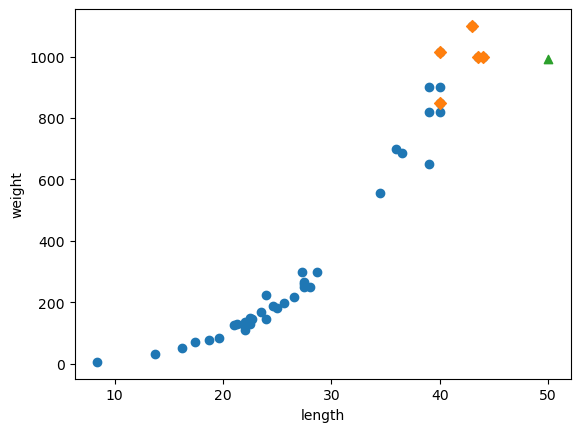

In [60]:
# 산점도 그리기
plt.figure()

plt.scatter(x_train, y_train)    # 훈련 데이터 산점도
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker = "D")    # 50cm농어와 이웃한 데이터들
plt.scatter(50, 993, marker = "^")    # 50cm 농어에 대한 KNN 모델의 예측값

# plt.scatter(df["Length2"], df["Weight"])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()